## Download data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Urls with selected MTA data (May 2019)
urls = [
    'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190504.txt',
    'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190511.txt',
    'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190518.txt',
    'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190525.txt'
]

In [3]:
# Read csv files in a dataframe
df_list = []
for url in urls:
    df_list.append(pd.read_csv(url))

mta = pd.concat(df_list)

## Data formating

In [4]:
# Check data for missing or null values
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822989 entries, 0 to 203362
Data columns (total 11 columns):
C/A                                                                     822989 non-null object
UNIT                                                                    822989 non-null object
SCP                                                                     822989 non-null object
STATION                                                                 822989 non-null object
LINENAME                                                                822989 non-null object
DIVISION                                                                822989 non-null object
DATE                                                                    822989 non-null object
TIME                                                                    822989 non-null object
DESC                                                                    822989 non-null object
ENTRIES                           

In [5]:
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [6]:
# Rename columns
mta.rename(columns={
    'C/A':'c_a',
    'UNIT':'unit',
    'SCP':'scp',
    'STATION':'station',
    'LINENAME':'linename',
    'DIVISION':'devision',
    'DATE':'date',
    'TIME':'time',
    'DESC':'desc',
    'ENTRIES':'entries',
    'EXITS                                                               ':'exits'
    }, inplace=True)

In [7]:
# Data statistics
mta.describe()

,entries,exits
count,8.229890e+05,8.229890e+05
mean,4.137444e+07,3.392040e+07
std,2.110233e+08,1.945992e+08
min,0.000000e+00,0.000000e+00
25%,3.552810e+05,1.453550e+05
50%,2.179688e+06,1.249356e+06
75%,6.796341e+06,4.610048e+06
max,2.129343e+09,2.124127e+09


In [8]:
#Make a column with a unique ID for each turnstile
mta['turnstile_id'] = mta['c_a'] + ', ' + mta['unit'] + ', '+ mta['scp'] + ', ' + mta['station']
mta.head()

,c_a,unit,scp,station,linename,devision,date,time,desc,entries,exits,turnstile_id
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,00:00:00,REGULAR,7035249,2384833,"A002, R051, 02-00-00, 59 ST"
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,04:00:00,REGULAR,7035269,2384840,"A002, R051, 02-00-00, 59 ST"
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,08:00:00,REGULAR,7035292,2384875,"A002, R051, 02-00-00, 59 ST"
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,12:00:00,REGULAR,7035392,2384951,"A002, R051, 02-00-00, 59 ST"
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,16:00:00,REGULAR,7035651,2385020,"A002, R051, 02-00-00, 59 ST"


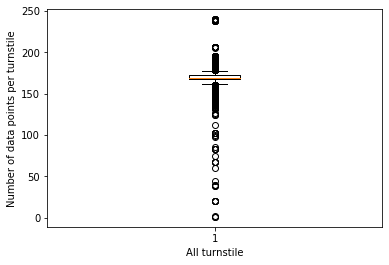

In [9]:
#Some turnstiles lack data. A few have more data points than expected.
plt.boxplot(mta.turnstile_id.value_counts()) 
plt.xlabel('All turnstile', fontsize=10)
plt.ylabel('Number of data points per turnstile', fontsize=10)
plt.savefig('tunstile_missing_data.svg')

In [10]:
# Add datetime and date variables
mta['Datetime'] = pd.to_datetime(mta['date'] + ' ' + mta['time'])
mta['Date'] = pd.to_datetime(mta['date'])

mta.head()

,c_a,unit,scp,station,linename,devision,date,time,desc,entries,exits,turnstile_id,Datetime,Date
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,00:00:00,REGULAR,7035249,2384833,"A002, R051, 02-00-00, 59 ST",2019-04-27 00:00:00,2019-04-27
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,04:00:00,REGULAR,7035269,2384840,"A002, R051, 02-00-00, 59 ST",2019-04-27 04:00:00,2019-04-27
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,08:00:00,REGULAR,7035292,2384875,"A002, R051, 02-00-00, 59 ST",2019-04-27 08:00:00,2019-04-27
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,12:00:00,REGULAR,7035392,2384951,"A002, R051, 02-00-00, 59 ST",2019-04-27 12:00:00,2019-04-27
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,16:00:00,REGULAR,7035651,2385020,"A002, R051, 02-00-00, 59 ST",2019-04-27 16:00:00,2019-04-27


In [11]:
# Number of unique turnstiles
len(mta.turnstile_id.unique())

4870

In [12]:
# Number of staions
len(mta.station.unique())

378

In [13]:
# Number of unique time points per day
len(mta.time.unique())

31054

In [14]:
# Sort to make sure date is in order (probably do not need it)
mta.sort_values(['turnstile_id', 'Date'])
mta.head()

,c_a,unit,scp,station,linename,devision,date,time,desc,entries,exits,turnstile_id,Datetime,Date
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,00:00:00,REGULAR,7035249,2384833,"A002, R051, 02-00-00, 59 ST",2019-04-27 00:00:00,2019-04-27
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,04:00:00,REGULAR,7035269,2384840,"A002, R051, 02-00-00, 59 ST",2019-04-27 04:00:00,2019-04-27
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,08:00:00,REGULAR,7035292,2384875,"A002, R051, 02-00-00, 59 ST",2019-04-27 08:00:00,2019-04-27
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,12:00:00,REGULAR,7035392,2384951,"A002, R051, 02-00-00, 59 ST",2019-04-27 12:00:00,2019-04-27
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,16:00:00,REGULAR,7035651,2385020,"A002, R051, 02-00-00, 59 ST",2019-04-27 16:00:00,2019-04-27


In [15]:
# Get minimum reading for each turnstile per day
mta_min = mta.groupby(['turnstile_id', 'Date'])['entries', 'exits', 'station'].min().reset_index()

In [16]:
# Calculating entries and exits per day by subtracting min entries for given day from the next day. 
# Last day values are not calculated due to "the lack of the next day value".
mta_daily = mta_min.copy()
mta_daily['entries_daily'] = mta_daily.groupby(['turnstile_id'])['entries'].diff()
mta_daily['exits_daily'] = mta_daily.groupby(['turnstile_id'])['exits'].diff()

In [17]:
# Fixing the `entries_daily` and `exits_daily`. Shifting up one row
mta_daily['entries_daily'] = mta_daily['entries_daily'].shift(-1)
mta_daily['exits_daily'] = mta_daily['exits_daily'].shift(-1)

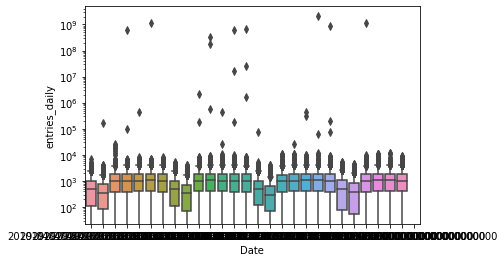

In [18]:
# /////
plt.yscale('log')
sns.boxplot(x='Date', y='entries_daily', data=mta_daily)

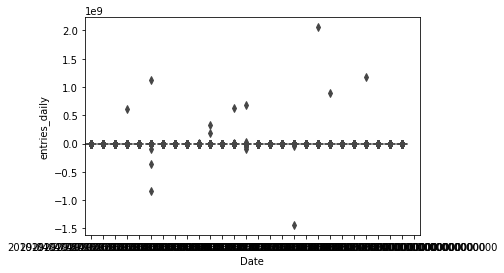

In [19]:
# ///////
sns.boxplot(x='Date', y='entries_daily', data=mta_daily)

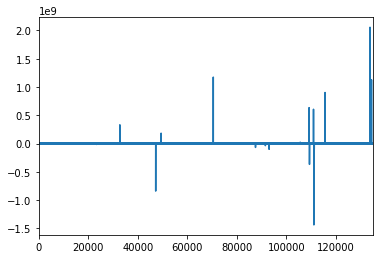

In [20]:
mta_daily.entries_daily.plot()

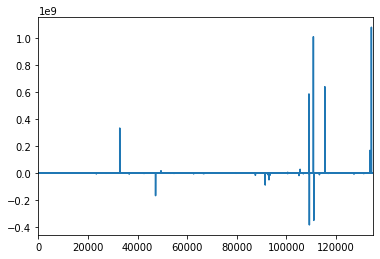

In [21]:
 mta_daily.exits_daily.plot()

In [22]:
# MTA daily number of passenger per station per day should not be more than ~200,000 (published info). 
# Note, we are looking at individual turnstiles, not stations yet - assume the daily max value to be below 20,000.
mta_daily.entries_daily.max()

2055526072.0

In [23]:
mta_daily.exits_daily.max()

1078346406.0

In [24]:
# Entry values >= 20,000
mta_daily.loc[mta_daily['entries_daily']>=20000].head()

,turnstile_id,Date,entries,exits,station,entries_daily,exits_daily
3805,"A038, R085, 00-06-00, 8 ST-NYU",2019-04-28,299330,58,8 ST-NYU,164073.0,121.0
26697,"JFK03, R536, 00-00-04, JFK JAMAICA CT1",2019-05-11,9341,5171,JFK JAMAICA CT1,74048.0,466740.0
29116,"N013, R035, 02-05-00, 168 ST",2019-05-08,5064,0,168 ST,453690.0,0.0
32804,"N056, R188, 01-00-01, 50 ST",2019-05-07,3422305,2643003,50 ST,331670366.0,332449101.0
36415,"N076, R111, 00-06-01, 23 ST",2019-05-06,131075,65543,23 ST,2091931.0,1867552.0


In [25]:
# Exit values >= 20,000
mta_daily.loc[mta_daily['exits_daily']>=20000].head()

,turnstile_id,Date,entries,exits,station,entries_daily,exits_daily
26697,"JFK03, R536, 00-00-04, JFK JAMAICA CT1",2019-05-11,9341,5171,JFK JAMAICA CT1,74048.0,466740.0
32804,"N056, R188, 01-00-01, 50 ST",2019-05-07,3422305,2643003,50 ST,331670366.0,332449101.0
36415,"N076, R111, 00-06-01, 23 ST",2019-05-06,131075,65543,23 ST,2091931.0,1867552.0
49450,"N221, R155, 00-00-02, KINGSBRIDGE RD",2019-05-07,746094,71764,KINGSBRIDGE RD,183862023.0,16714186.0
64898,"N508, R453, 00-00-00, 23 ST",2019-04-29,238093041,458034675,23 ST,18891.0,41201.0


In [26]:
# Entry values < 0
mta_daily.loc[mta_daily['entries_daily']<0].head()
# Daily entries should not be negative. Need to get back to this to understand why.

,turnstile_id,Date,entries,exits,station,entries_daily,exits_daily
2152,"A025, R023, 01-03-01, 34 ST-HERALD SQ",2019-04-27,1238468553,1813265330,34 ST-HERALD SQ,-2299.0,1332.0
2153,"A025, R023, 01-03-01, 34 ST-HERALD SQ",2019-04-28,1238466254,1813266662,34 ST-HERALD SQ,-3573.0,946.0
2154,"A025, R023, 01-03-01, 34 ST-HERALD SQ",2019-04-29,1238462681,1813267608,34 ST-HERALD SQ,-3872.0,1778.0
2155,"A025, R023, 01-03-01, 34 ST-HERALD SQ",2019-04-30,1238458809,1813269386,34 ST-HERALD SQ,-4181.0,1769.0
2156,"A025, R023, 01-03-01, 34 ST-HERALD SQ",2019-05-01,1238454628,1813271155,34 ST-HERALD SQ,-4047.0,1926.0


In [27]:
# Exits values < 0
mta_daily.loc[mta_daily['exits_daily']<0].head()
# Daily exits should not be negative. Need to get back to this to understand why.

,turnstile_id,Date,entries,exits,station,entries_daily,exits_daily
3804,"A038, R085, 00-06-00, 8 ST-NYU",2019-04-27,292602,23454,8 ST-NYU,6728.0,-23396.0
4672,"A046, R463, 00-00-03, CANAL ST",2019-04-27,126021,10181,CANAL ST,-125997.0,-10177.0
7724,"A069, R044, 01-06-01, CHAMBERS ST",2019-04-27,744282975,1799923493,CHAMBERS ST,142.0,-2110.0
7725,"A069, R044, 01-06-01, CHAMBERS ST",2019-04-28,744283117,1799921383,CHAMBERS ST,273.0,-4470.0
7726,"A069, R044, 01-06-01, CHAMBERS ST",2019-04-29,744283390,1799916913,CHAMBERS ST,526.0,-6331.0


In [28]:
# Remove the daily enatries and exits that do not make sence (> 20,000 and < 0)
mta_daily_clean = mta_daily.copy()

mta_daily_clean.loc[mta_daily_clean['entries_daily'] >= 20000,'entries_daily'] = np.nan
mta_daily_clean.loc[mta_daily_clean['entries_daily'] < 0,'entries_daily'] = np.nan

mta_daily_clean.loc[mta_daily_clean['exits_daily'] >= 20000,'exits_daily'] = np.nan
mta_daily_clean.loc[mta_daily_clean['exits_daily'] < 0,'exits_daily'] = np.nan

In [29]:
# Daily entries and exits by stations
station_daily = mta_daily_clean.groupby(['station', 'Date'])['entries_daily', 'exits_daily'].sum().reset_index()
station_daily['traffic'] = station_daily['entries_daily'] + station_daily['exits_daily']

In [30]:
station_daily.head()

,station,Date,entries_daily,exits_daily,traffic
0,1 AV,2019-04-27,6338.0,9067.0,15405.0
1,1 AV,2019-04-28,4555.0,6428.0,10983.0
2,1 AV,2019-04-29,18018.0,20164.0,38182.0
3,1 AV,2019-04-30,18923.0,20459.0,39382.0
4,1 AV,2019-05-01,19226.0,21574.0,40800.0


In [31]:
# Sum of entries by stations for May 2019
station_total = station_daily.groupby(['station'])['entries_daily', 'exits_daily', 'traffic'].sum().reset_index()

In [37]:
# Top 10 staions by total traffic over the entered time period
station_total.sort_values(['traffic'], ascending=False).head(10)

,station,entries_daily,exits_daily,traffic
61,34 ST-PENN STA,4002022.0,3651913.0,7653935.0
232,GRD CNTRL-42 ST,3450679.0,2983117.0,6433796.0
59,34 ST-HERALD SQ,2780614.0,2724537.0,5505151.0
14,14 ST-UNION SQ,2535253.0,2335510.0,4870763.0
352,TIMES SQ-42 ST,2408098.0,2272374.0,4680472.0
46,23 ST,2697873.0,1962542.0,4660415.0
68,42 ST-PORT AUTH,2271729.0,1952661.0,4224390.0
225,FULTON ST,2266523.0,1901995.0,4168518.0
110,86 ST,2001485.0,1840529.0,3842014.0
9,125 ST,1820524.0,1585083.0,3405607.0


In [33]:
# Top 10 staions by daily average traffic
station_daily_mean = station_daily.groupby(['station'])['Date', 'entries_daily', 'exits_daily', 'traffic'].mean()

In [34]:
station_daily_mean.sort_values(['traffic'], ascending=False).head(10)

,entries_daily,exits_daily,traffic
station,,,
34 ST-PENN STA,142929.357143,130425.464286,273354.821429
GRD CNTRL-42 ST,123238.535714,106539.892857,229778.428571
34 ST-HERALD SQ,99307.642857,97304.892857,196612.535714
14 ST-UNION SQ,90544.750000,83411.071429,173955.821429
TIMES SQ-42 ST,86003.500000,81156.214286,167159.714286
23 ST,96352.607143,70090.785714,166443.392857
42 ST-PORT AUTH,81133.178571,69737.892857,150871.071429
FULTON ST,80947.250000,67928.392857,148875.642857
86 ST,71481.607143,65733.178571,137214.785714


In [35]:
top_stations = [
    '34 ST-PENN STA',
    'GRD CNTRL-42 ST',
    '34 ST-HERALD SQ',
    '14 ST-UNION SQ',
    'TIMES SQ-42 ST',
    '23 ST',
    '42 ST-PORT AUTH',
    'FULTON ST', 
    '86 ST', 
    '125 ST'
]

In [36]:
top_station_names = [
    '34 Street Penn Station',
    'Grand Central Terminal',
    '34th Street - Herald Square Station',
    '14th Street - Union Square Station',
    'Times Square - 42nd Street Station',
    '23 Street Station',
    '42 Street - Port Authority Station',
    'Fulton Street Station',
    '86 Street Station',
    '125 Street Station'
]

# Graphs